<a href="https://colab.research.google.com/github/hericax/Pos/blob/master/projeto_3/aed_projeto_3(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 2

# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

Questionamentos a serem investigados:

1 - As maiores média de votos está relacionada a algum genero específico?

2 - As maiores média de votos está relacionada a algum idioma original?

3 - As maiores média de votos está relacionada a algum cia de produção?

!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0

!apt-get install graphviz

In [1]:

# IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import missingno as msno #! pip install missingno


from sklearn.preprocessing import StandardScaler #z-score
from sklearn import preprocessing # normalização MIM-MAX
from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste

from sklearn.tree import DecisionTreeRegressor
# from sklearn import tree
from sklearn.metrics import confusion_matrix


from sklearn.metrics import accuracy_score
from sklearn import utils

import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import time

from sklearn.ensemble import RandomForestRegressor

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# lendo arquivo no google drive
'''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = '/content/drive/My Drive/Colab Notebooks/projeto_3/filmes/filmes_df_limpo.csv'
df = pd.read_csv(arquivo_base)
df.head()
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive', force_remount=True)\narquivo_base = '/content/drive/My Drive/Colab Notebooks/projeto_3/filmes/filmes_df_limpo.csv'\ndf = pd.read_csv(arquivo_base)\ndf.head()\n"

In [3]:
# lendo o arquivo localmente
df_final = pd.read_csv(r'C:\Users\User\Documents\pos\GitHub\Pos\projeto_3\base\filmes_df_limpo.csv')

In [4]:
df_final.head(3)

,titulo,generos_ordenados,descricao,duracao,video,ano_lancamento,lingua,cod_lingua,qtde_votos,acao,...,Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),English,Français,日本語,Italiano,Español,media_votos
0,Toy Story,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",81.0,False,1995,Inglês,1.0,5415.0,False,...,False,False,False,False,True,False,False,False,False,7.7
1,Jumanji,"['Adventure', 'Family', 'Fantasy']",When siblings Judy and Peter discover an encha...,104.0,False,1995,Inglês,1.0,2413.0,False,...,False,False,False,False,True,True,False,False,False,6.9
2,Grumpier Old Men,"['Comedy', 'Romance']",A family wedding reignites the ancient feud be...,101.0,False,1995,Inglês,1.0,92.0,False,...,False,False,False,False,True,False,False,False,False,6.5


In [5]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

## Hipótese 1 - As maiores média de votos está relacionada a algum genero específico?

In [6]:
df_final.dtypes

titulo                                       object
generos_ordenados                            object
descricao                                    object
duracao                                     float64
video                                          bool
ano_lancamento                                int64
lingua                                       object
cod_lingua                                  float64
qtde_votos                                  float64
acao                                           bool
aventura                                       bool
animacao                                       bool
comedia                                        bool
crime                                          bool
documentario                                   bool
drama                                          bool
familia                                        bool
fantasia                                       bool
estrangeiro                                    bool
historia    

Text(0,0.5,'Média Votos')

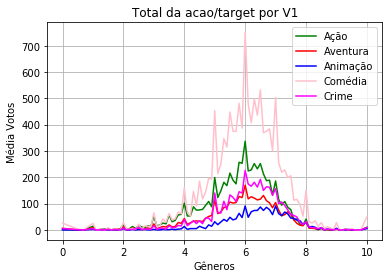

In [7]:
# Como são várias as features de gênero, as dividi em grupo para facilitar a visualização
x = df_final.groupby(['media_votos']).sum()

x['acao'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ação')
x['aventura'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Aventura')
x['animacao'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Animação')
x['comedia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Comédia')
x['crime'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Crime')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que a comédia é o gênero com maior média de votos, seguido da ação

Text(0,0.5,'Média Votos')

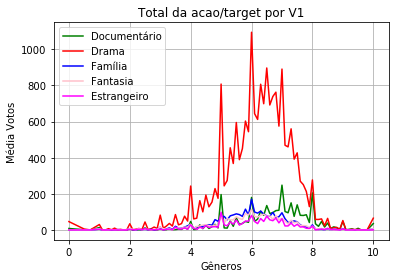

In [8]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['documentario'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Documentário')
x['drama'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Drama')
x['familia'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Família')
x['fantasia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Fantasia')
x['estrangeiro'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Estrangeiro')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, estando os demais mais ou menos no memo nível

Text(0,0.5,'Média Votos')

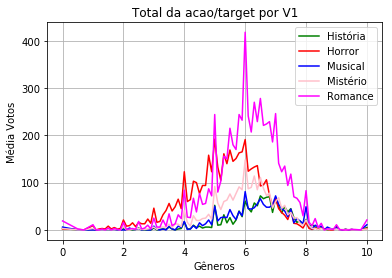

In [9]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['historia'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='História')
x['horror'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Horror')
x['musical'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Musical')
x['misterio'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Mistério')
x['romance'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Romance')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o romance é o gênero com maior média de votos, segido do horror.

Text(0,0.5,'Média Votos')

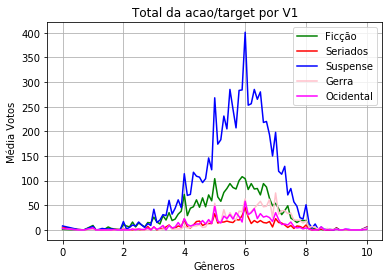

In [10]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['ficcao_cientifica'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ficção')
x['filmes_tv'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Seriados')
x['suspense'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Suspense')
x['gerra'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Gerra')
x['ocidental'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Ocidental')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o suspense é o gênero com maior média de votos, seguido da ficção

Text(0,0.5,'Média Votos')

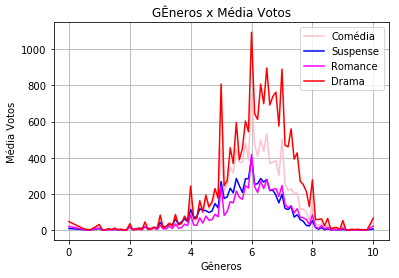

In [11]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['comedia'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='Comédia')
x['suspense'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Suspense')
x['romance'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Romance')
x['drama'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Drama')

plt.legend()
plt.title('GÊneros x Média Votos')
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, seguido da comédia. Os demais estão parecidos.

Conforme observamos, o gênero que possui a maior média de votos é o Drama, seja isolado, seja em conjunto com outros gêneros. Dos 10 maiores, o Drama está presente em 6. 

## Hipótese 2 - As maiores média de votos está relacionada a algum idioma original?

In [12]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [13]:
lingua = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
lingua

,media_votos
lingua,
Inglês,175428.2
Francês,14640.3
Japonês,8418.3
Italiano,8251.3
Espanhol,7795.5
Alemão,6277.7
Russo,4658.3
Hindi,2904.2
Coreano,2903.4


Text(0.5,1,'Lingua x média de votos')

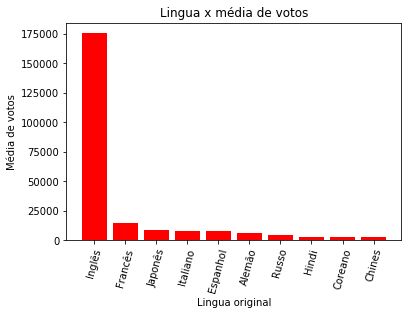

In [14]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.lingua,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Lingua original")
plt.ylabel("Média de votos")
plt.title("Lingua x média de votos")

In [15]:
total_ingles = len(df_final[df_final['lingua'] == "Inglês"])

outras_linguas = ['Francês', 'Chines', 'Italiano', 'Persa', 'Neerlandês',
       'Alemão', 'Mandarim padrão', 'Argentino', 'Espanhol', 'Russo',
       'Japonês', 'Coreano', 'Sérvio', 'Bengali', 'Hebraico', 'Português',
       'Wolof', 'Romeno', 'Húngaro', 'Galês', 'Vietnamita', 'hrv',
       'Dinamarquês', 'Norueguês', 'Bokmål norueguês', 'Polonês',
       'Grego, Moderno', 'Shan', 'No Language', 'Macedônio', 'Tibetano',
       'Catalão', 'Finlandês', 'Tailandês', 'Eslovaco', 'Bósnio', 'Hindi',
       'Turco', 'Islandês', 'Pachto', 'Abecásio', 'Esperanto',
       'Georgiano', 'Mongol', 'Bambara', 'Zulu', 'Ucraniano', 'Africâner',
       'Latim', 'Estoniano', 'Curdo', 'Letão', 'Tâmil', 'Esloveno',
       'Tagalog', 'Urdu', 'Kinyarwanda', 'Indonésio', 'Búlgaro',
       'Marathi (Marāṭhī)', 'Lituano', 'Cazaque', 'Malaio', 'Albanês',
       'Quechua', 'Telugu', 'Amárico', 'Javanês', 'Tajique', 'Malayalam',
       'Croata', 'Lao', 'Aymará', 'Canarês', 'Nepali', 'Panjabi, Punjabi',
       'Galego', 'Quirguiz, Kyrgyz', 'Samoano', 'Basco', 'Tcheco',
       'Armênio', 'Inuktitut', 'Sinhala, Cingalês']
total_outras = 0
for i in outras_linguas:
    total_outras = total_outras + len(df_final[df_final['lingua'] == i])

total_linguas = total_outras + total_ingles

In [16]:
print ('total_outras=',total_outras, 'total_ingles=', total_ingles, '\n Total linguas', total_linguas, '\n diferença ingles - outras= ', total_ingles - total_outras, '\n registros dataset=', len(df_final.lingua))

total_outras= 12316 total_ingles= 29795 
 Total linguas 42111 
 diferença ingles - outras=  17479 
 registros dataset= 42111


In [17]:
print ("Ingles=", (total_ingles/total_linguas)*100)
print ("Outras=", (total_outras/total_linguas)*100)

Ingles= 70.75348483769086
Outras= 29.246515162309134


Percebe-se acima que mesmo somando todas as outras linguas originais dos filmes, o inglês é o maior idioma, com 70%. 

## Hipótese 3 - As maiores média de votos está relacionada a algum cia de produção?

In [18]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [19]:
print ('MGM', len(df_final[df_final['Metro-Goldwyn-Mayer (MGM)'] == True]))
print ('Warner', len(df_final[df_final['Warner Bros.'] == True]))
print ('Paramount', len(df_final[df_final['Paramount Pictures'] == True]))
print ('Fox', len(df_final[df_final['Twentieth Century Fox Film Corporation'] == True]))
print ('Universal', len(df_final[df_final['Universal Pictures'] == True]))
print ('RKO', len(df_final[df_final['RKO Radio Pictures'] == True]))
print ('Columbia', len(df_final[df_final['Columbia Pictures'] == True]))
print ('Mosfilm', len(df_final[df_final['Mosfilm'] == True]))
print ('Walt Disney', len(df_final[df_final['Walt Disney Pictures'] == True]))
print ('Universal International Pictures (UI)', len(df_final[df_final['Universal International Pictures (UI)'] == True]))

MGM 990
Warner 1186
Paramount 968
Fox 812
Universal 817
RKO 259
Columbia 419
Mosfilm 183
Walt Disney 261
Universal International Pictures (UI) 94


Text(0,0.5,'Média Votos')

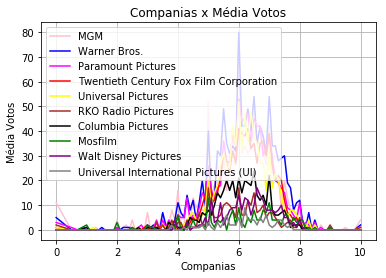

In [20]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'line',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'line',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'line',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'line',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'line',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'line',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')

plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

In [21]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

Text(0,0.5,'Média Votos')

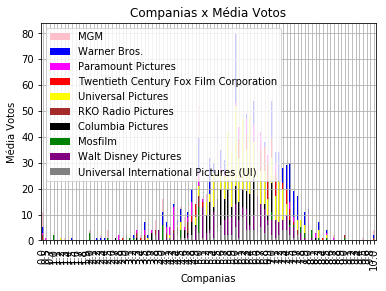

In [22]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()


x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'bar',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'bar',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'bar',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'bar',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'bar',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'bar',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'bar',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'bar',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'bar',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'bar',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')


plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

Percebe-se que a companhia com as maiores médias de votos é a Warner

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

Será criado um modelo de regrassão para prever a média de votos dos filmes.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


### DISCRETIZAÇÃO DA FEATURE DURACAO

In [23]:
# verificando a correlação da duração com a média de votos
corr_ini_duracao = df_final['duracao'].corr(df_final['media_votos'])
print ('duração x media_votos',corr_ini_duracao)

duração x media_votos 0.1052361083182149


In [24]:
df_final.duracao.dtype

dtype('float64')

In [25]:
# Vou tentar criar grupos para definir a feture e verificar se há melhora na correlação
intervals = pd.qcut(df_final['duracao'], 2).astype(str).unique()
intervals

array(['(0.999, 95.0]', '(95.0, 1256.0]'], dtype=object)

In [26]:
df_final['tipo_duracao'] = pd.qcut(df_final['duracao'], 2).astype(str).map( {
                            intervals[0]: 'media',
                            intervals[1]: 'longa'
                            } ).astype(str)
df_final[['duracao','tipo_duracao']]

,duracao,tipo_duracao
0,81.0,media
1,104.0,longa
2,101.0,longa
3,127.0,longa
4,106.0,longa
5,170.0,longa
6,127.0,longa
7,97.0,longa
8,106.0,longa
9,130.0,longa


Text(0.5,1,'Tipo de duração x média de votos')

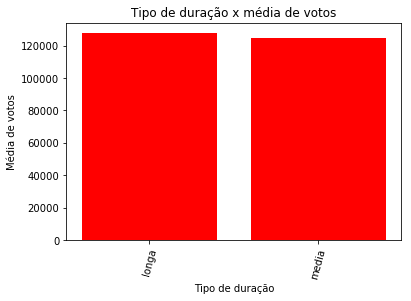

In [27]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['tipo_duracao','media_votos']].groupby('tipo_duracao').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.tipo_duracao,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Tipo de duração")
plt.ylabel("Média de votos")
plt.title("Tipo de duração x média de votos")

In [28]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['tipo_duracao'].map({
'media': 0, 
'longa': 1})

In [29]:
# verificando a correlação da duração com a média de votos
corr_fim_duracao = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Tipo duração x media_votos',corr_fim_duracao)

Tipo duração x media_votos 0.15434812442481713


In [30]:
print ('Final', corr_fim_duracao, ' | inicial', corr_ini_duracao)

Final 0.15434812442481713  | inicial 0.1052361083182149


Fiz o teste da correlação para os valores de 2 a 5 grupos. Quanto maior a qtde de grupos, pior a correlação.
Nova feature mantida pois houve uma pequena melhora na correlação.

### DISCRETIZAÇÃO DA FEATURE ANO_LANCAMENTO

In [31]:
# verificando a correlação da duração com a média de votos
corr_ini_anoLancamento = df_final['ano_lancamento'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_ini_anoLancamento)

Ano lançamento x media_votos -0.030914166602693516


In [32]:
# tentar criar períodos para melhor a correlação
# avaliando a quantidade de períodos a serem criados 
intervals = pd.qcut(df_final['ano_lancamento'], 10).astype(str).unique()
intervals

array(['(1985.0, 1995.0]', '(1995.0, 2001.0]', '(1972.0, 1985.0]',
       '(1955.0, 1972.0]', '(1873.999, 1955.0]', '(2009.0, 2012.0]',
       '(2012.0, 2014.0]', '(2001.0, 2006.0]', '(2006.0, 2009.0]',
       '(2014.0, 2017.0]'], dtype=object)

In [33]:
# criando os perídos para definir o ano de lançamento dos filmes
df_final['periodo'] = pd.qcut(df_final['ano_lancamento'], 10).astype(str).map({intervals[0]: '1993 a 2000',
        intervals[1]: '1970 a 1982',
        intervals[2]: '1982 a 1993',
        intervals[3]: '1952 a 1970',
        intervals[4]: '1873 a 1952',
        intervals[5]: '2000 a 2005',
        intervals[6]: '2009 a 2012',
        intervals[7]: '2012 a 2014',
        intervals[8]: '2005 a 2009',
        intervals[9]: '2014 a 2020'} ).astype(str)

df_final[['ano_lancamento','periodo']]

,ano_lancamento,periodo
0,1995,1993 a 2000
1,1995,1993 a 2000
2,1995,1993 a 2000
3,1995,1993 a 2000
4,1995,1993 a 2000
5,1995,1993 a 2000
6,1995,1993 a 2000
7,1995,1993 a 2000
8,1995,1993 a 2000
9,1995,1993 a 2000


Text(0.5,1,'Período x média de votos')

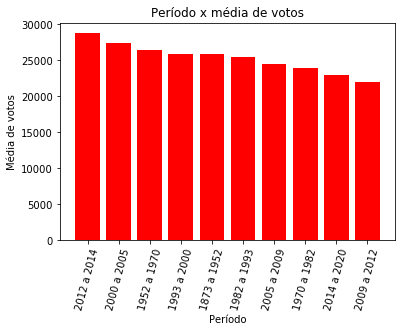

In [34]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['periodo','media_votos']].groupby('periodo').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.periodo,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Período")
plt.ylabel("Média de votos")
plt.title("Período x média de votos")

In [35]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['periodo'].map({
    '1993 a 2000': 0,
    '1970 a 1982': 1,
    '1982 a 1993': 2,
    '1952 a 1970': 3,
    '1873 a 1952': 4,
    '2000 a 2005': 5,
    '2009 a 2012': 6,
    '2012 a 2014': 7,
    '2005 a 2009': 8,
    '2014 a 2020': 9
})

In [36]:
# verificando a correlação da duração com a média de votos
corr_fim_anoLancamento = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_fim_anoLancamento)

Ano lançamento x media_votos 0.0041960230418060995


In [37]:
print (" final= ", corr_fim_anoLancamento, "| inicial = ",corr_ini_anoLancamento)

final=  0.0041960230418060995 | inicial =  -0.030914166602693516


In [38]:
# Houve melhora então a nova feature será mantida

### FAZER A CORRELAÇÃO DAS FEATURES A SEREM TRABALHADAS

In [39]:
# verificando a correlação dos generos

print ('acao x media_votos',df_final['acao'].corr(df_final['media_votos']))
print ('aventura x media_votos',df_final['aventura'].corr(df_final['media_votos']))
print ('animacao x media_votos',df_final['animacao'].corr(df_final['media_votos']))
print ('comedia x media_votos',df_final['comedia'].corr(df_final['media_votos']))
print ('crime x media_votos',df_final['crime'].corr(df_final['media_votos']))
print ('documentario x media_votos',df_final['documentario'].corr(df_final['media_votos']))
print ('drama x media_votos',df_final['drama'].corr(df_final['media_votos']))
print ('familia x media_votos',df_final['familia'].corr(df_final['media_votos']))
print ('fantasia x media_votos',df_final['fantasia'].corr(df_final['media_votos']))
print ('estrangeiro x media_votos',df_final['estrangeiro'].corr(df_final['media_votos']))
print ('historia x media_votos',df_final['historia'].corr(df_final['media_votos']))
print ('horror x media_votos',df_final['horror'].corr(df_final['media_votos']))
print ('musical x media_votos',df_final['musical'].corr(df_final['media_votos']))
print ('misterio x media_votos',df_final['misterio'].corr(df_final['media_votos']))
print ('romance x media_votos',df_final['romance'].corr(df_final['media_votos']))
print ('ficcao_cientifica x media_votos',df_final['ficcao_cientifica'].corr(df_final['media_votos']))
print ('filmes_tv x media_votos',df_final['filmes_tv'].corr(df_final['media_votos']))
print ('suspense x media_votos',df_final['suspense'].corr(df_final['media_votos']))
print ('gerra x media_votos',df_final['gerra'].corr(df_final['media_votos']))
print ('ocidental x media_votos',df_final['ocidental'].corr(df_final['media_votos']))

acao x media_votos -0.08289026991958116
aventura x media_votos -0.027941596379633827
animacao x media_votos 0.0746324060560334
comedia x media_votos -0.017782075432232005
crime x media_votos 0.024917113064367006
documentario x media_votos 0.15044245555978156
drama x media_votos 0.12205091845631541
familia x media_votos -0.013866659798187594
fantasia x media_votos -0.013615448225225844
estrangeiro x media_votos -0.004523470611788797
historia x media_votos 0.05796654102202993
horror x media_votos -0.18819159408147706
musical x media_votos 0.048918980962778316
misterio x media_votos -0.008024703581022129
romance x media_votos 0.011018217859676384
ficcao_cientifica x media_votos -0.11295899314774671
filmes_tv x media_votos -0.037092699780905784
suspense x media_votos -0.09543228084790213
gerra x media_votos 0.03892514555383778
ocidental x media_votos -0.03503105661478553


In [40]:
#Excluir as features com correlação negativa
'''acao x media_votos -0.08289026991958133
aventura x media_votos -0.02794159637963377
comedia x media_votos -0.01778207543223205
familia x media_votos -0.01386665979818757
fantasia x media_votos -0.013615448225225833
estrangeiro x media_votos -0.0045234706117887975
horror x media_votos -0.18819159408147684
misterio x media_votos -0.008024703581022141
ficcao_cientifica x media_votos -0.11295899314774636
filmes_tv x media_votos -0.03709269978090582
suspense x media_votos -0.09543228084790208
ocidental x media_votos -0.03503105661478576'''

df_final.drop(['acao','aventura','comedia', 'familia', 'fantasia', 'estrangeiro', 'horror', 'misterio',
    'ficcao_cientifica', 'filmes_tv', 'suspense', 'ocidental'], axis = 1, inplace = True)

In [41]:
print ('video x media_votos',df_final['video'].corr(df_final['media_votos']))

video x media_votos -0.006780320444616411


In [42]:
# remoção da feature video
df_final.drop(['video'], axis = 1, inplace = True)

In [43]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais producao)', 'English', 'Français', '日本語', 'Italiano',
       'Español', 'media_votos', 'tipo_duracao', 'periodo'],
      dtype='object')

In [44]:
# features de companhias de produção
''''Metro-Goldwyn-Mayer (MGM)','Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)'
       '''

print ('MGV',df_final['Metro-Goldwyn-Mayer (MGM)'].corr(df_final['media_votos']))
print ('Warner Bros. x media_votos',df_final['Warner Bros.'].corr(df_final['media_votos']))
print ('Paramount x media_votos',df_final['Paramount Pictures'].corr(df_final['media_votos']))
print ('Fox x media_votos',df_final['Twentieth Century Fox Film Corporation'].corr(df_final['media_votos']))
print ('Universal Pictures x media_votos',df_final['Universal Pictures'].corr(df_final['media_votos']))
print ('RKO Radio Pictures x media_votos',df_final['RKO Radio Pictures'].corr(df_final['media_votos']))
print ('Columbia Pictures x media_votos',df_final['Columbia Pictures'].corr(df_final['media_votos']))
print ('Mosfilm x media_votos',df_final['Mosfilm'].corr(df_final['media_votos']))
print ('Walt Disney Pictures x media_votos',df_final['Walt Disney Pictures'].corr(df_final['media_votos']))
print ('Universal International Pictures (UI) x media_votos',df_final['Universal International Pictures (UI)'].corr(df_final['media_votos']))

MGV -0.00564314490666169
Warner Bros. x media_votos 0.019301369645698428
Paramount x media_votos 0.013957583811027276
Fox x media_votos 0.02034178521398111
Universal Pictures x media_votos 0.01823466714177934
RKO Radio Pictures x media_votos -0.005677699693419912
Columbia Pictures x media_votos 0.00245139979446295
Mosfilm x media_votos 0.005155744715740212
Walt Disney Pictures x media_votos 0.017480801711270456
Universal International Pictures (UI) x media_votos 0.0061057330103446664


In [45]:
# excluido das features com correlação negativa
'''
MGV -0.005643144906661703
RKO Radio Pictures x media_votos -0.005677699693419887

'''

df_final.drop(['Metro-Goldwyn-Mayer (MGM)','RKO Radio Pictures'], axis = 1, inplace = True)

In [46]:
# features de paizes onde os filmes foram produzidos
'''
'United States of America', 'United Kingdom', 'France', 'Japan',
       'Italy', 'Canada', 'Canada.1', 'Canada.2', 'Canada.3', 'Germany',
       'Russia', 'India', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'English', 'Français', '日本語', 'Italiano', 'Español'
    '''
print ('United States of America',df_final['United States of America (pais producao)'].corr(df_final['media_votos']))
print ('United Kingdom x media_votos',df_final['United Kingdom (pais producao)'].corr(df_final['media_votos']))
print ('France x media_votos',df_final['France (pais producao)'].corr(df_final['media_votos']))
print ('Japan x media_votos',df_final['Japan (pais producao)'].corr(df_final['media_votos']))
print ('Italy x media_votos',df_final['Italy (pais producao)'].corr(df_final['media_votos']))
print ('Canada x media_votos',df_final['Canada (pais producao)'].corr(df_final['media_votos']))


United States of America -0.10648717484568729
United Kingdom x media_votos 0.05259387167117548
France x media_votos 0.0710288987447066
Japan x media_votos 0.07031332540118475
Italy x media_votos 0.020547268018409805
Canada x media_votos -0.04293418732490294


In [47]:
# remoção das features com correlação negativa
'''
United States of America -0.10648717484568719
Canada x media_votos -0.04293418732490301
'''

df_final.drop(['United States of America (pais producao)','Canada (pais producao)'], axis = 1, inplace = True)

In [48]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'English',
       'Français', '日本語', 'Italiano', 'Español', 'media_votos', 'tipo_duracao',
       'periodo'],
      dtype='object')

In [49]:
# correlação dos idimos de tradução
''' 'English', 'Français', '日本語', 'Italiano', 'Español' '''

print ('English x media_votos',df_final['English'].corr(df_final['media_votos']))
print ('Français x media_votos',df_final['Français'].corr(df_final['media_votos']))
print ('日本語 x media_votos',df_final['日本語'].corr(df_final['media_votos']))
print ('Italiano x media_votos',df_final['Italiano'].corr(df_final['media_votos']))
print ('Español x media_votos',df_final['Español'].corr(df_final['media_votos']))

English x media_votos -0.11048853817921588
Français x media_votos 0.05660434292842852
日本語 x media_votos 0.07409012325949083
Italiano x media_votos 0.02156935241418854
Español x media_votos 0.027626715546068135


In [50]:
# remoção das features com correlação negativa
'''
English x media_votos -0.1104885381792159
'''

df_final.drop(['English'], axis = 1, inplace = True)

# inicio dos testes

In [51]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'media_votos', 'tipo_duracao', 'periodo'],
      dtype='object')

Dividindo o target em classes

In [52]:
# dividindo em três classes
pd.cut(df_final['media_votos'], 5).head()

0    (6.0, 8.0]
1    (6.0, 8.0]
2    (6.0, 8.0]
3    (6.0, 8.0]
4    (4.0, 6.0]
Name: media_votos, dtype: category
Categories (5, interval[float64]): [(-0.01, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0]]

In [53]:
df_final['target'] = pd.cut(df_final['media_votos'], 5)

In [54]:
df_final['target']

0          (6.0, 8.0]
1          (6.0, 8.0]
2          (6.0, 8.0]
3          (6.0, 8.0]
4          (4.0, 6.0]
5          (6.0, 8.0]
6          (6.0, 8.0]
7          (4.0, 6.0]
8          (4.0, 6.0]
9          (6.0, 8.0]
10         (6.0, 8.0]
11         (4.0, 6.0]
12         (6.0, 8.0]
13         (6.0, 8.0]
14         (4.0, 6.0]
15         (6.0, 8.0]
16         (6.0, 8.0]
17         (6.0, 8.0]
18         (6.0, 8.0]
19         (4.0, 6.0]
20         (6.0, 8.0]
21         (6.0, 8.0]
22         (4.0, 6.0]
23         (6.0, 8.0]
24         (6.0, 8.0]
25         (6.0, 8.0]
26         (6.0, 8.0]
27         (6.0, 8.0]
28         (6.0, 8.0]
29         (6.0, 8.0]
             ...     
42081      (4.0, 6.0]
42082      (4.0, 6.0]
42083    (-0.01, 2.0]
42084      (6.0, 8.0]
42085      (2.0, 4.0]
42086      (2.0, 4.0]
42087     (8.0, 10.0]
42088      (6.0, 8.0]
42089      (4.0, 6.0]
42090      (4.0, 6.0]
42091      (4.0, 6.0]
42092      (6.0, 8.0]
42093      (6.0, 8.0]
42094      (4.0, 6.0]
42095     

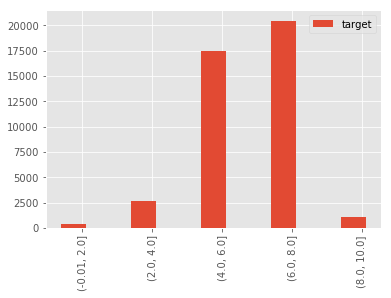

In [55]:
plt.style.use('ggplot')

a = df_final.groupby('target').size()

categories = df_final['target'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='target')

plt.xticks(ind + width / 3, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

# fim dos testes

In [56]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'media_votos', 'tipo_duracao', 'periodo',
       'target'],
      dtype='object')

## SELECIONANDO AS FEATURES

In [57]:
#Selecionando as features que serão utilizadas para redução da dimensionalidade e normalização 
X = df_final[[ 
    'ano_lancamento', 'cod_lingua', 'qtde_votos', 
       'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'
       ]]
       
y = df_final['media_votos'].round(0)

In [58]:
# target desbalanceados
y.value_counts()

6.0     15532
7.0     10145
5.0      7267
8.0      3782
4.0      3461
3.0       811
2.0       403
9.0       288
10.0      200
1.0       122
0.0       100
Name: media_votos, dtype: int64

In [59]:
# guardando o rótulo das colunas
cols = X.columns

## REDUÇÃO DA DIMENSIONALIDADE



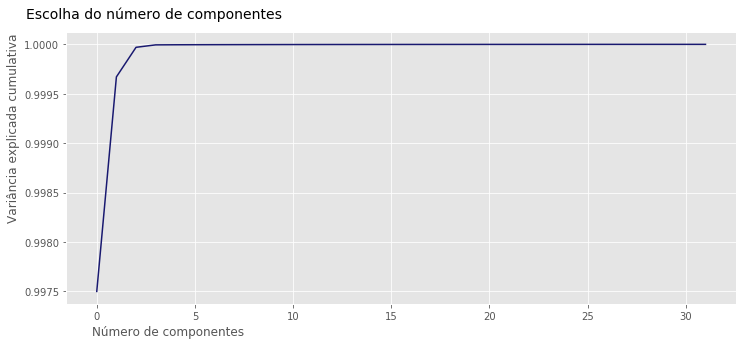

In [60]:
# AVALIAR QUAL A QUANTIDADE DE COMPONENTES UTILIZAR NO pca

plt.rcParams['figure.figsize'] = [12, 5]

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#191970')

plt.title('Escolha do número de componentes', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('Variância explicada cumulativa', horizontalalignment='left', y=0.30)
plt.xlabel('Número de componentes', horizontalalignment='right', x=0.265)
plt.show()

In [61]:
# APLICAR O PCA
dados_dimensionados = PCA(n_components=3).fit_transform(X)

dados_dimensionados = pd.DataFrame(dados_dimensionados)

dados_dimensionados.head(3)

,0,1,2
0,5296.451913,24.369031,4.075405
1,2294.493396,9.198037,-0.267284
2,-26.474498,-2.529592,-3.619711


In [62]:
# APLICAR O PCA
'''
dados_dimensionados = PCA(n_components=3).fit_transform(X)
dados_dimensionados
'''

'\ndados_dimensionados = PCA(n_components=3).fit_transform(X)\ndados_dimensionados\n'

In [63]:
dados_dimensionados.shape

(42111, 3)

## NORMALIZAÇÃO DOS DADOS

NORMALIZAÇÃO MIM-MAX

In [64]:
# A normalização é feita feature a feature e o objeto é colocar as variáveis dentro do intervalo de 0 e 1
min_max_scaler = preprocessing.MinMaxScaler() #dimensiona e traduz cada recurso individualmente, de modo que esteja no intervalo especificado no conjunto de treinamento (entre zero e um)
x_scaled = min_max_scaler.fit_transform(X)
df_normalizado_MIMMAX = pd.DataFrame(x_scaled)

# renomeando as colunas
df_normalizado_MIMMAX.set_axis(cols, axis='columns', inplace=True)
df_normalizado_MIMMAX.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,0.846154,0.0,0.384681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.846154,0.0,0.171380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.846154,0.0,0.006466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df_normalizado_MIMMAX.shape


(42111, 32)

NORMALIZAÇÃO Z-SCORE

In [66]:
# normalizar os recursos (cada coluna dos dados) para que cada coluna/recurso/variável tenha mean = 0 e standard deviation = 1.
scaler = StandardScaler()
df_normalizado_scaler = scaler.fit_transform(X)
df_normalizado_scaler = pd.DataFrame(df_normalizado_scaler)

# renomeando as colunas
df_normalizado_scaler.set_axis(cols, axis='columns', inplace=True)
df_normalizado_scaler.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,0.117197,-0.385,10.396118,4.649301,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,-0.424002,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,-0.323657,-0.200471,-0.227139,-0.230814,-1.569163
1,0.117197,-0.385,4.503718,-0.215086,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,-0.424002,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,3.089693,-0.200471,-0.227139,-0.230814,-1.569163
2,0.117197,-0.385,-0.051999,-0.215086,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,2.358477,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,-0.323657,-0.200471,-0.227139,-0.230814,-1.569163


In [67]:
df_normalizado_scaler.shape

(42111, 32)

In [68]:
type(df_normalizado_scaler)

pandas.core.frame.DataFrame

RobustScaler

In [69]:
#subtrai a média do valor em questão e então divide o resultado pelo segundo quartil.
df_nomealizado_robust = RobustScaler().fit_transform(X)
df_nomealizado_robust = pd.DataFrame(df_nomealizado_robust)

# renomeando as colunas
df_nomealizado_robust.set_axis(cols, axis='columns', inplace=True)
df_nomealizado_robust.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,-0.1875,0.0,154.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8
1,-0.1875,0.0,68.628571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.8
2,-0.1875,0.0,2.314286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8


In [70]:
df_nomealizado_robust.shape

(42111, 32)

3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


Será utilizado como métrica o desvio padrão, que que serve para dizer o quanto os valores dos quais se extraiu a média são próximos ou distantes da própria média. Assim, quando se calcula o desvio padrão juntamente com a média de diferentes grupos, obtém-se mais informações para avaliar e diferenciar seus comportamentos.

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


In [71]:
# semente aleatória a ser utilizada em tydi
RANDOM_STATE = 1 #semente aleatória
test_size = 0.35 # 35% será amostra de teste

Divisão dos dados - redimencionados (PCA)

In [72]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(dados_dimensionados,y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)
                            

In [73]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_PCA.shape,'y=', y_train_PCA.shape,'\n','Dados de teste: X= ', X_test_PCA.shape,'y=', y_test_PCA.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 3) y= (27372,) 
 Dados de teste: X=  (14739, 3) y= (14739,)


Divisão dos dados - normalização MIM_MAx

In [74]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_MIMMAX, X_test_MIMMAX, y_train_MIMMAX, y_test_MIMMAX = train_test_split(df_normalizado_MIMMAX, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [75]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_MIMMAX.shape,'y=', y_train_MIMMAX.shape,'\n','Dados de teste: X= ', X_test_MIMMAX.shape,'y=', y_test_MIMMAX.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


Divisão dos dados - normalização Z-SCORE

In [76]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(df_normalizado_scaler, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [77]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_scaler.shape,'y=', y_train_scaler.shape,'\n','Dados de teste: X= ', X_test_scaler.shape,'y=', y_test_scaler.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


Divisão dos dados - normalização ROBUST

In [78]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(df_nomealizado_robust, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [79]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_robust.shape,'y=', y_train_robust.shape,'\n','Dados de teste: X= ', X_test_robust.shape,'y=', y_test_robust.shape)

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


In [80]:
'''
# criar o DF para armazenas as métrica coletadas em cada algoritmo
COLUNAS = [
    'tipo_dado', # se é PCA, MIM-MAX, Scaler ou robust
    'media_teste', 
    'media_treino',
    'diferenca_media',
    'desvio_teste' ,
    'desvio_teste',
    'diferenca_desvio'    
]

df_tree_metricas = pd.DataFrame(columns=COLUNAS)
df_tree_metricas
'''

"\n# criar o DF para armazenas as métrica coletadas em cada algoritmo\nCOLUNAS = [\n    'tipo_dado', # se é PCA, MIM-MAX, Scaler ou robust\n    'media_teste', \n    'media_treino',\n    'diferenca_media',\n    'desvio_teste' ,\n    'desvio_teste',\n    'diferenca_desvio'    \n]\n\ndf_tree_metricas = pd.DataFrame(columns=COLUNAS)\ndf_tree_metricas\n"

# DEFININDO AS FUNÇÕES QUE SERÃO UTILIZADAS PARA RODAR OS MODELOS, PLOTAR A MATRIZ DE CONFUSÃO E ARMAZENAR AS MÉTRICAS COLETADAS

In [81]:
# criando do dataframe para armazenar as métricas coletadas a cada execução do modelo
columns = ['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'] 
''''
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
metricas = pd.DataFrame(columns=columns)

# função para inserir registro no dataframe
def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [82]:
import itertools


# FUNÇÃO PARA RODAR O MODELO
def roda_modelo (tipo, nome_modelo, X_train, y_train, X_test, y_test, modelo):
    modelo.fit(X_train, y_train) # TREINANDO A ARVORE COM OS DADOS DE TREINO
    y_pred = modelo.predict(X_test) # predizendo o target
    
    print ("{} do {}".format(tipo, nome_modelo))
    print ("\n")

    classes = [0,1,2,3,4,5,6,7,8,9,10]
    resultados = mostra_resultados(y_test, y_pred, classes,tipo, nome_modelo)
    
    return resultados, modelo


# FUNÇÃO PARA PLOTAR A MATRIZ DE CONFUSÃO
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# FUNÇÃO PARA MOSTRA RESULTADOS OBTIDOS NO MODELO
def mostra_resultados(y, y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred.round(0))
    #cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos
    TP = np.diag(cm)                   # Verdadeiro Positivo
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos
    TPR = TP / (TP + FN)  # Revocação    
    PPV = TP / (TP + FP)  # Precisao
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia

    desvio_y_test = y.std()
    desvio_y_pred = y_pred.std()
    diferenca_desvio = desvio_y_test - desvio_y_pred

    media_y_test = y.mean()
    media_y_prev = y_pred.mean()
    diferenca_media = media_y_test - media_y_prev

    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    
    
    print("\n\n")

    print("    F1 Score:{}".format(F1.round(4)))
    print("    \nAcuracia:{}".format(ACC.round(4)*100))

    print("    \n Desvio \n")
    print("    y_tes:{}".format(desvio_y_test))
    print("    y_pred:{}".format(desvio_y_pred))
    print("    Diferença:{}".format(diferenca_desvio))
    
    print("    \n Média \n")
    print("    y_tes:{}".format(media_y_test))
    print("    y_pred:{}".format(media_y_prev))
    print("    Diferença:{}".format(diferenca_media))
    
    print("\n\n")

    plot_confusion_matrix(cm, classes)

    return desvio_y_test, desvio_y_pred, diferenca_desvio, media_y_test, media_y_prev, diferenca_media, y_pred

# MODELO 1 - DECISION TREE

In [83]:
# CRIAÇÃO DO MODELO COM PARÂMETROS PADRÃO
dec_clf = DecisionTreeRegressor(random_state=RANDOM_STATE)

In [84]:
dec_clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

# INICIO TESTES

## PCA

BASELINE DECISION TREE do PCA


    Verdadeiros Positivos:[   7    2    6   12  188  631 2284 1026  234    0    5]
    Verdadeiros Negativos:[14689 14681 14513 14280 12413  9962  5904  8935 12439 14600 14630]
    Falso Positivo:[  16   21   66  179 1129 2231 3307 2343  966   50   36]
    Falso Negativo:[  27   35  154  268 1009 1915 3244 2435 1100   89   68]
    Revocação:[0.20588235 0.05405405 0.0375     0.04285714 0.15705931 0.24783975
 0.41316932 0.29644611 0.17541229 0.         0.06849315]
    Precisao:[0.30434783 0.08695652 0.08333333 0.06282723 0.14274867 0.22047519
 0.40851368 0.30454141 0.195      0.         0.12195122]



    F1 Score:[0.2456 0.0667 0.0517 0.051  0.1496 0.2334 0.4108 0.3004 0.1847    nan
 0.0877]
    
Acuracia:[99.71 99.62 98.51 96.97 85.49 71.87 55.55 67.58 85.98 99.06 99.29]
    
 Desvio 

    y_tes:1.3109352144373203
    y_pred:1.2048312022373984
    Diferença:0.10610401219992194
    
 Média 

    y_tes:5.991790487821426
    y_pred:5.964371134683116
    Dif

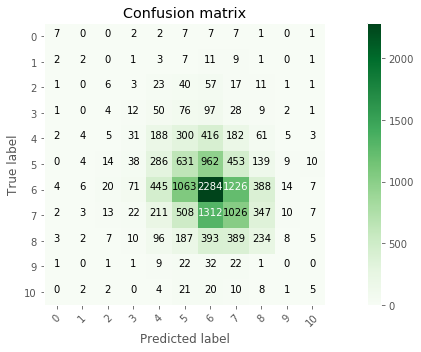

In [85]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_PCA_tree = roda_modelo('BASELINE DECISION TREE', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA, dec_clf)

#resultados_PCA = roda_arvore('BASELINE', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['DECISION TREE REGRESSOR', 'BASELINE', 'PCA', resultados_PCA_tree[0][0],resultados_PCA_tree[0][1], resultados_PCA_tree[0][2], resultados_PCA_tree[0][3],resultados_PCA_tree[0][4],resultados_PCA_tree[0][5]])

## MIM-MAX

BASELINE DECISON TREE do MIM-MAX


    Verdadeiros Positivos:[   8    3    6   12  218  675 2323 1159  303    0    3]
    Verdadeiros Negativos:[14686 14661 14471 14286 12456 10060  5977  9085 12488 14571 14620]
    Falso Positivo:[  19   41  108  173 1086 2133 3234 2193  917   79   46]
    Falso Negativo:[  26   34  154  268  979 1871 3205 2302 1031   89   70]
    Revocação:[0.23529412 0.08108108 0.0375     0.04285714 0.18212197 0.26512176
 0.42022431 0.33487431 0.22713643 0.         0.04109589]
    Precisao:[0.2962963  0.06818182 0.05263158 0.06486486 0.16717791 0.24038462
 0.41803131 0.34576372 0.24836066 0.         0.06122449]



    F1 Score:[0.2623 0.0741 0.0438 0.0516 0.1743 0.2521 0.4191 0.3402 0.2373    nan
 0.0492]
    
Acuracia:[99.69 99.49 98.22 97.01 85.99 72.83 56.31 69.5  86.78 98.86 99.21]
    
 Desvio 

    y_tes:1.3109352144373203
    y_pred:1.2489917621104916
    Diferença:0.06194345232682874
    
 Média 

    y_tes:5.991790487821426
    y_pred:5.9602827390416975
   

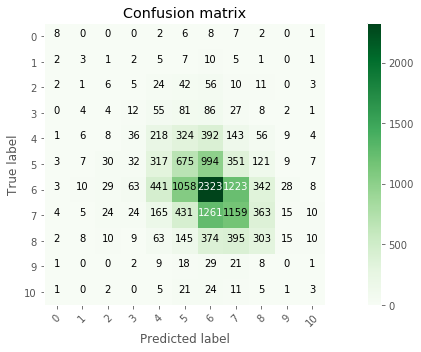

In [86]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_tree = roda_modelo('BASELINE DECISON TREE', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, dec_clf)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['DECISION TREE REGRESSOR', 'BASELINE', 'MIM-MAX', resultados_MIMMAX_tree[0][0],resultados_MIMMAX_tree[0][1], resultados_MIMMAX_tree[0][2], resultados_MIMMAX_tree[0][3],resultados_MIMMAX_tree[0][4],resultados_MIMMAX_tree[0][5]])

## Z-SCORE

BASELINE - DECISION TREE do SCALER


    Verdadeiros Positivos:[   8    3    6   11  216  676 2326 1167  296    0    3]
    Verdadeiros Negativos:[14686 14661 14471 14288 12455 10067  5974  9075 12497 14572 14617]
    Falso Positivo:[  19   41  108  171 1087 2126 3237 2203  908   78   49]
    Falso Negativo:[  26   34  154  269  981 1870 3202 2294 1038   89   70]
    Revocação:[0.23529412 0.08108108 0.0375     0.03928571 0.18045113 0.26551453
 0.420767   0.33718578 0.22188906 0.         0.04109589]
    Precisao:[0.2962963  0.06818182 0.05263158 0.06043956 0.1657713  0.24125625
 0.41811972 0.3462908  0.24584718 0.         0.05769231]



    F1 Score:[0.2623 0.0741 0.0438 0.0476 0.1728 0.2528 0.4194 0.3417 0.2333    nan
 0.048 ]
    
Acuracia:[99.69 99.49 98.22 97.01 85.97 72.89 56.31 69.49 86.8  98.87 99.19]
    
 Desvio 

    y_tes:1.3109352144373203
    y_pred:1.2479650551675006
    Diferença:0.06297015926981975
    
 Média 

    y_tes:5.991790487821426
    y_pred:5.960825516706397
  

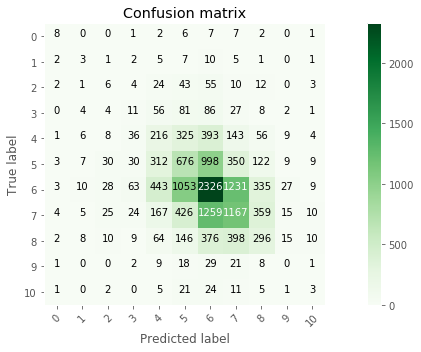

In [87]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_scaler_tree = roda_modelo('BASELINE - DECISION TREE', 'SCALER', X_train_scaler, y_train_scaler, X_test_scaler, y_test_scaler, dec_clf)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['DECISION TREE REGRESSOR', 'BASELINE', 'SCALER', resultados_scaler_tree[0][0],resultados_scaler_tree[0][1], resultados_scaler_tree[0][2], resultados_scaler_tree[0][3],resultados_scaler_tree[0][4],resultados_scaler_tree[0][5]])

## ROBUST

BASELINE DECISION TREE do ROBUST


    Verdadeiros Positivos:[   8    3    6   12  216  675 2332 1165  305    0    3]
    Verdadeiros Negativos:[14686 14661 14470 14287 12451 10063  5984  9091 12490 14573 14620]
    Falso Positivo:[  19   41  109  172 1091 2130 3227 2187  915   77   46]
    Falso Negativo:[  26   34  154  268  981 1871 3196 2296 1029   89   70]
    Revocação:[0.23529412 0.08108108 0.0375     0.04285714 0.18045113 0.26512176
 0.42185239 0.33660792 0.22863568 0.         0.04109589]
    Precisao:[0.2962963  0.06818182 0.05217391 0.06521739 0.16526396 0.24064171
 0.41949991 0.3475537  0.25       0.         0.06122449]



    F1 Score:[0.2623 0.0741 0.0436 0.0517 0.1725 0.2523 0.4207 0.342  0.2388    nan
 0.0492]
    
Acuracia:[99.69 99.49 98.22 97.01 85.94 72.85 56.42 69.58 86.81 98.87 99.21]
    
 Desvio 

    y_tes:1.3109352144373203
    y_pred:1.2488965590620273
    Diferença:0.06203865537529296
    
 Média 

    y_tes:5.991790487821426
    y_pred:5.959479880412663
    

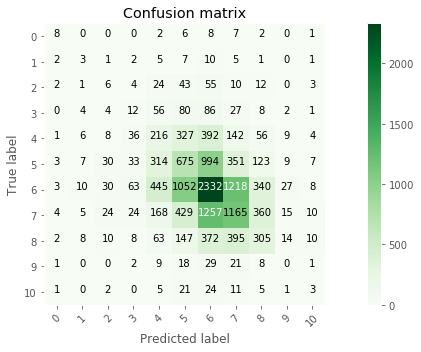

In [88]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_robust_tree = roda_modelo('BASELINE DECISION TREE', 'ROBUST', X_train_robust, y_train_robust, X_test_robust, y_test_robust, dec_clf)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['DECISION TREE REGRESSOR', 'BASELINE', 'ROBUST', resultados_robust_tree[0][0],resultados_robust_tree[0][1], resultados_robust_tree[0][2], resultados_robust_tree[0][3],resultados_robust_tree[0][4],resultados_robust_tree[0][5]])

In [89]:
metricas

,nome_modelo,tipo_predicao,tipo_dado,desvio_original,desvio_pred,diferenca_desvio,media_original,media_predita,diferenca_media
0,DECISION TREE REGRESSOR,BASELINE,PCA,1.310935,1.204831,0.106104,5.99179,5.964371,0.027419
1,DECISION TREE REGRESSOR,BASELINE,MIM-MAX,1.310935,1.248992,0.061943,5.99179,5.960283,0.031508
2,DECISION TREE REGRESSOR,BASELINE,SCALER,1.310935,1.247965,0.062970,5.99179,5.960826,0.030965
3,DECISION TREE REGRESSOR,BASELINE,ROBUST,1.310935,1.248897,0.062039,5.99179,5.959480,0.032311


In [90]:
# conforme observado o modelo com o menor desvio foi o DECISION TREE REGRESSOR com a normalização MIM-MAX
print ("Modelo com menor desvio", min(metricas.diferenca_desvio))

Modelo com menor desvio 0.06194345232682874


# FIM TESTES

# inicio - deletar após o termino dos testes

## Baseline - PCA

In [91]:
from sklearn import tree
tree.export_graphviz(resultados_robust_tree[1])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [92]:
digraph G {

  subgraph cluster_0 {
    style=filled;
    color=lightgrey;
    node [style=filled,color=white];
    a0 -> a1 -> a2 -> a3;
    label = "process #1";
  }

  subgraph cluster_1 {
    node [style=filled];
    b0 -> b1 -> b2 -> b3;
    label = "process #2";
    color=blue
  }
  start -> a0;
  start -> b0;
  a1 -> b3;
  b2 -> a3;
  a3 -> a0;
  a3 -> end;
  b3 -> end;

  start [shape=Mdiamond];
  end [shape=Msquare];
}

SyntaxError: invalid syntax (<ipython-input-92-d90d9132fb12>, line 1)

In [93]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(resultados_robust_tree[1], out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

# fim - deletar após o termino dos testes

## Utilizando cross-validation e GridSearchCV para melhorar os modelos

In [2]:
# obtendo quais são os parâmetros disponíveis na árvore, para uso no grid-search
dec_clf.get_params().keys()

NameError: name 'dec_clf' is not defined

In [95]:
# parâmetros a serem avaliados
# Escolhi os parâmetros que acredito que são os mais comuns de serem utilizados
param_grid = [
              {
                 'criterion':['mse', 'friedman_mse', 'mae'],
                 'max_depth': [5, 20, 100, 400, None], # profundidade máxima da árvore
                 'min_samples_split': [2, 50, 300, 1000], # O número mínimo de amostras necessárias para dividir um nó interno
                 'min_samples_leaf': [30, 120, 420, 820], # número mínimo de amostras necessárias para estar em um nó folha
                 'random_state': [RANDOM_STATE], 
                 'splitter': ['best']
              }

]

In [1]:
# execução do gridsearch para definição dos melhores parâmetros
gs = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count())
gs

NameError: name 'GridSearchCV' is not defined

# função para rodar o CROSS-VALIDATION

In [99]:
# função que executa o griserachCV com a lista de parâmetros para definir a configuração com melhor score
def definir_parametros (X_train, y_train, gs):
    #classes = [0,1,2,3,4,5,6,7,8,9,10]
    #gs = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())

    gs.fit(X_train, y_train) # TREINARNDO A ÁRVORE
    # execução do cross-validation com os parâmetros sugeridos pelo gridsearch
    cross_val_score(gs.best_estimator_,X_train, y_train,scoring='r2',cv=15).mean()
    
    
    print('Melhor estimador=',gs.best_estimator_)
    print("Melhor score=",gs.best_score_ * 100)

    return gs.best_estimator_

# INICIO DOS TESTES

## PCA

In [100]:
# ----------------------------------------
# Chama a função que roda o griSerachCV com os dados de treino para obter o melhor estimador
tic = time.time()

resultados_PCA_CV = definir_parametros(X_train_PCA, y_train_PCA,gs)

tac = time.time()
# ----------------------------------------

# TREINANDO A ARVORE COM OS DADOS DE TREINO
dec_clf_cv.fit(X_train_PCA, y_train_PCA) 
tempo_que_passou = tac - tic

# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_PCA_treecv = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA, dec_clf_cv)

# impressão do tempo gasto no treino
print("Tempo %.2f segundos" % tempo_que_passou)

In [ ]:
# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'GS + CV', 'PCA', resultados_PCA_treecv[0][0],resultados_PCA_treecv[0][1], resultados_PCA_treecv[0][2], resultados_PCA_treecv[0][3],resultados_PCA_treecv[0][4],resultados_PCA_treecv[0][5]])

## MIM-MAX

In [ ]:
# ----------------------------------------
# Chama a função que roda o griSerachCV com os dados de treino para obter o melhor estimador
tic = time.time()

resultados_MIMMAX_CV = definir_parametros(X_train_MIMMAX, y_train_MIMMAX)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
# ----------------------------------------

# TREINANDO A ARVORE COM OS DADOS DE TREINO
dec_clf_cv.fit(X_train_MIMMAX, y_train_MIMMAX) 


# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_treecv = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, dec_clf_cv)

In [ ]:
# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'GS + CV', 'MIM-MAX', resultados_MIMMAX_treecv[0],resultados_MIMMAX_treecv[1], resultados_MIMMAX_treecv[2], resultados_MIMMAX_treecv[3],resultados_MIMMAX_treecv[4],resultados_MIMMAX_treecv[5]])

## Z-SCORE

In [ ]:
# ----------------------------------------
# Chama a função que roda o griSerachCV com os dados de treino para obter o melhor estimador
tic = time.time()

resultados_scaler_CV = definir_parametros(X_train_scaler, y_train_scaler)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
# ----------------------------------------

# TREINANDO A ARVORE COM OS DADOS DE TREINO
dec_clf_cv.fit(X_train_scaler, y_train_scaler) 


# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_scaler_treecv = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'Z-Score', X_train_scaler, y_train_scaler, X_test_scaler, y_test_scaler, dec_clf_cv)

In [ ]:
# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'GS + CV', 'SCALER', resultados_scaler_treecv[0],resultados_scaler_treecv[1], resultados_scaler_treecv[2], resultados_scaler_treecv[3],resultados_scaler_treecv[4],resultados_scaler_treecv[5]])

# ROBUST

In [ ]:
# ----------------------------------------
# Chama a função que roda o griSerachCV com os dados de treino para obter o melhor estimador
tic = time.time()

resultados_robust_CV = definir_parametros(X_train_robust, y_train_robust)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
# ----------------------------------------

# TREINANDO A ARVORE COM OS DADOS DE TREINO
dec_clf_cv.fit(X_train_robust, y_train_robust) 


# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_robust_treecv = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'ROBUST', X_train_robust, y_train_robust, X_test_robust, y_test_robust, dec_clf_cv)

In [ ]:
# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'GS + CV', 'ROBUST', resultados_robust_treecv[0],resultados_robust_treecv[1], resultados_robust_treecv[2], resultados_robust_treecv[3],resultados_robust_treecv[4],resultados_robust_treecv[5]])

In [ ]:
metricas

# FIM DOS TESTES

In [ ]:
'''
# função que roda a árvore com os parâmetros definidos pelo gridserachCV

def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row
        
# CRIA A ARVORE - Os parâmetros definidos pelo GRIDSEARCHCV são iguais para os 4 tipos de dados (PCA, MIMMAX, Z-SCORE, ROBUST)
dec_clf_cv = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth= 5, # profundidade máxima da árvore
    min_samples_split= 2, # O número mínimo de amostras necessárias para dividir um nó interno
    min_samples_leaf= 80, # número mínimo de amostras necessárias para estar em um nó folha
    random_state= RANDOM_STATE, 
    splitter='best') 

def roda_arvore_cv (tipo, modelo, X_train, y_train, X_test, y_test):
    dec_clf_cv.fit(X_train, y_train) # TREINANDO A ARVORE COM OS DADOS DE TREINO

    desvio_y_original = y_test.std() # calculando o desvio do tareget original
    media_original = y_test.mean()

    y_pred_cv = dec_clf_cv.predict(X_test) # predizendo o target
    desvio_padrao_cv = y_pred_cv.std() # calculando o desvio do dado predito
    diferenca_cv = desvio_y_original - desvio_padrao_cv # calculando a diferença entre o desvio dos dados originais e do predito
    acuracia_cv = accuracy_score(y_test, y_pred_cv) #calculando a acurácia
    media_predita = y_pred_cv.mean()
    diferenca_media = media_original - media_predita
    print ('BASELINE', '|', modelo, '| Desvio_original:', desvio_y_original.round(3), '| Desvio padrão:', desvio_padrao_cv.round(3), '| Diferença:', diferenca_cv.round(3), '| Acurácia:', acuracia_cv.round(3)*100, ' | Media original:', media_original, ' | media_predita:', media_predita, ' | diferenca_media:', diferenca_media)

    # -----------------------------------------------
    # inserindo os dados no dataframe de metricas
    #insert(metricas, [tipo, modelo, desvio_y_original, desvio_padrao, diferenca, acuracia])
    # -----------------------------------------------
    return dec_clf_cv, y_pred_cv

    '''

### PCA

In [ ]:
'''
# Executa o GRIDSEARCHCV com os dados do PCA
tic = time.time()

resultados_PCA_CV = definir_parametros(X_train_PCA, y_train_PCA)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
'''

In [ ]:
'''
# RODAR A ÁRVORE COM OS PARAMETROS DEFINIDOS PELO GRIDSERACHCV
resultados_PCA_cv = roda_arvore_cv('ÁRVORE COM RESULTADO CV', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA)
'''

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_PCA,resultados_PCA_cv[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_PCA_cv[0].classes_), index=(resultados_PCA_cv[0].classes_))
'''

### MIMMAX

In [ ]:

'''
# Executa o GRIDSEARCHCV com os dados do MIMMAX

tic = time.time()

resultados_MIMMAX_CV = definir_parametros(X_train_MIMMAX, y_train_MIMMAX)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
'''

In [ ]:
'''
# RODAR A ÁRVORE COM OS PARAMETROS DEFINIDOS PELO GRIDSERACHCV
resultados_MIMMAX_cv = roda_arvore_cv('COM GRIDSEARCHCV', 'MIMMAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX)
'''

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_MIMMAX,resultados_MIMMAX_cv[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_MIMMAX_cv[0].classes_), index=(resultados_MIMMAX_cv[0].classes_))
'''

### Z-SCORE

In [ ]:
'''
tic = time.time()

resultados_scaler_CV = definir_parametros(X_train_scaler, y_train_scaler)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
'''

In [ ]:
#resultados_scaler_cv = roda_arvore_cv('BASELINE', 'Z-SCORE', X_train_scaler, y_train_scaler, X_test_scaler, y_test_scaler)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_scaler,resultados_scaler_cv[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_scaler_cv[0].classes_), index=(resultados_scaler_cv[0].classes_))
'''

### ROBUST

In [ ]:
'''
tic = time.time()

resultados_robust_CV = definir_parametros(X_train_robust, y_train_robust)

tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
'''

In [ ]:
#resultados_robust_cv = roda_arvore('BASELINE', 'Z-SCORE', X_train_robust, y_train_robust, X_test_robust, y_test_robust)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_robust,resultados_robust_cv[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_robust_cv[0].classes_), index=(resultados_robust_cv[0].classes_))
'''

# MODELO 2 - RANDOM FOREST

In [ ]:
'''
def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

randonForest = RandomForestRegressor()

def roda_random_forest (tipo, modelo, X_train, y_train, X_test, y_test):
    randonForest.fit(X_train, y_train) # TREINANDO A ARVORE COM OS DADOS DE TREINO

    desvio_y_original = y_test.std() # calculando o desvio do tareget original
    media_original = y_test.mean()

    y_pred = randonForest.predict(X_test) # predizendo o target
    desvio_padrao = y_pred.std() # calculando o desvio do dado predito
    diferenca = desvio_y_original - desvio_padrao # calculando a diferença entre o desvio dos dados originais e do predito
    media_predita = y_pred.mean()
    diferenca_media = media_original - media_predita
    #acuracia = accuracy_score(y_test, y_pred) #calculando a acurácia

    print ('BASELINE', '|', modelo, '| Desvio_original:', desvio_y_original.round(3), '| Desvio padrão:', desvio_padrao.round(3), '| Diferença:', diferenca.round(3), #'\n Acurácia:', acuracia.round(3)*100,
    ' \n Média_original', media_original.round(3), ' | Media predita:', media_predita.round(3), '| Diferença-média', diferenca_media.round(3))

    # -----------------------------------------------
    # inserindo os dados no dataframe de metricas
    #insert(metricas, [tipo, modelo, desvio_y_original, desvio_padrao, diferenca, acuracia])
    # -----------------------------------------------
    return randonForest, y_pred
    '''

# inicio - apagar depois de ajustar todo o código

In [ ]:
'''
# criando do dataframe para armazenar as métricas coletadas a cada execução do modelo
columns = ['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'] 
''''
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
metricas = pd.DataFrame(columns=columns)


def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

        '''

In [ ]:
'''
import itertools



def roda_random_forest (tipo, nome_modelo, X_train, y_train, X_test, y_test, modelo):
    modelo.fit(X_train, y_train) # TREINANDO A ARVORE COM OS DADOS DE TREINO
    y_pred = modelo.predict(X_test) # predizendo o target
    
    print ("{} do {}".format(tipo, nome_modelo))
    print ("\n")

    classes = [0,1,2,3,4,5,6,7,8,9,10]
    resultados = mostra_resultados(y_test, y_pred, classes,tipo, nome_modelo)
    
    return resultados



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# MOSTRA RESULTADOS
def mostra_resultados(y, y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred.round(0))
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos
    TP = np.diag(cm)                   # Verdadeiro Positivo
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos
    TPR = TP / (TP + FN)  # Revocação    
    PPV = TP / (TP + FP)  # Precisao
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia

    desvio_y_test = y.std()
    desvio_y_pred = y_pred.std()
    diferenca_desvio = desvio_y_test - desvio_y_pred

    media_y_test = y.mean()
    media_y_prev = y_pred.mean()
    diferenca_media = media_y_test - media_y_prev

    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    
    
    print("\n\n")

    print("    F1 Score:{}".format(F1.round(4)))
    print("    \nAcuracia:{}".format(ACC.round(4)*100))

    print("    \n Desvio \n")
    print("    y_tes:{}".format(desvio_y_test.round(4)*100))
    print("    y_pred:{}".format(desvio_y_pred.round(4)*100))
    print("    Diferença:{}".format(diferenca_desvio.round(4)*100))
    
    print("    \n Média \n")
    print("    y_tes:{}".format(media_y_test.round(4)*100))
    print("    y_pred:{}".format(media_y_prev.round(4)*100))
    print("    Diferença:{}".format(diferenca_media.round(4)*100))
    
    print("\n\n")

    plot_confusion_matrix(cm, classes)

    return desvio_y_test, desvio_y_pred, diferenca_desvio, media_y_test, media_y_prev, diferenca_media, y_pred
'''

# fim - apagar depois de ajustar todo o código

In [ ]:
# Criando o modelo
randonForest = RandomForestRegressor()

In [ ]:
randonForest

### PCA

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_PCA_randomForest = roda_modelo('BASELINE RANDON FOREST', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA, randonForest)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['RANDOM FOREST REGRESSOR', 'BASELINE', 'PCA', resultados_PCA_randomForest[0],resultados_PCA_randomForest[1], resultados_PCA_randomForest[2], resultados_PCA_randomForest[3],resultados_PCA_randomForest[4],resultados_PCA_randomForest[5]])

### MIMMAX

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_randomForest = roda_modelo('BASELINE RANDON FOREST', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, randonForest)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['RANDOM FOREST REGRESSOR', 'BASELINE', 'PCA', resultados_MIMMAX_randomForest[0],resultados_MIMMAX_randomForest[1], resultados_MIMMAX_randomForest[2], resultados_MIMMAX_randomForest[3],resultados_MIMMAX_randomForest[4],resultados_MIMMAX_randomForest[5]])

### Z-SCORE

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_scaler_randomForest = roda_modelo('BASELINE RANDON FOREST', 'SCALER', X_train_scaler, y_train_scaler, X_test_scaler, y_test_scaler, randonForest)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['RANDOM FOREST REGRESSOR', 'BASELINE', 'SCALER', resultados_scaler_randomForest[0],resultados_scaler_randomForest[1], resultados_scaler_randomForest[2], resultados_scaler_randomForest[3],resultados_scaler_randomForest[4],resultados_scaler_randomForest[5]])

### ROBUST

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_robust_randomForest = roda_modelo('BASELINE RANDON FOREST', 'ROBUST', X_train_robust, y_train_robust, X_test_robust, y_test_robust, randonForest)

# Armazenando os dados
''''
insert(metricas,['nome_modelo', 'tipo_predicao', 'tipo_dado', 'desvio_original','desvio_pred', 'diferenca_desvio', 'media_original', 'media_predita', 'diferenca_media'])
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CROSS VALIDATION + GRIDSEARCHCV
# TIPO_DADO: PCA, MIMMAX, SCALER, ROBUST
'''
insert(metricas,['RANDOM FOREST REGRESSOR', 'BASELINE', 'ROBUST', resultados_robust_randomForest[0],resultados_robust_randomForest[1], resultados_robust_randomForest[2], resultados_robust_randomForest[3],resultados_robust_randomForest[4],resultados_robust_randomForest[5]])

In [ ]:
metricas

# INICIO EXCLUIR

## RESULTADO DA PREDIÇÃO SEM GRIDSEARCH + CROSS VALIDATION

### PCA

In [ ]:
#resultados_PCA_randomForest = roda_random_forest('BASELINE RANDON FOREST', 'PCA', X_train_PCA, y_train_PCA, X_test_PCA, y_test_PCA)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_robust,resultados_PCA_randomForest[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_PCA_randomForest[0].classes_), index=(resultados_PCA_randomForest[0].classes_))
111

### MINMAX

In [ ]:
#resultados_MIMMAX_randomForest = roda_random_forest('BASELINE RANDON FOREST', 'MIMMAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_robust,resultados_MIMMAX_randomForest[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_MIMMAX_randomForest[0].classes_), index=(resultados_MIMMAX_randomForest[0].classes_))
'''

### Z-SCORE

In [ ]:
#resultados_scaler_randomForest = roda_random_forest('BASELINE RANDON FOREST', 'scaler', X_train_scaler, y_train_scaler, X_test_scaler, y_test_scaler)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_robust,resultados_scaler_randomForest[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_scaler_randomForest[0].classes_), index=(resultados_scaler_randomForest[0].classes_))
'''

### ROBUST

In [ ]:
#resultados_robust_randomForest = roda_random_forest('BASELINE RANDON FOREST', 'robust', X_train_robust, y_train_robust, X_test_robust, y_test_robust)

In [ ]:
'''
# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_robust,resultados_robust_randomForest[1])

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
pd.DataFrame(cnf_matrix, columns=(resultados_robust_randomForest[0].classes_), index=(resultados_robust_randomForest[0].classes_))
'''

In [ ]:
#mostra_resultados(y_test, y_pred, modelo.classes_)

# FIM EXCLUIR

## RESULTADO DA PREDIÇÃO COM GRIDSEARCH + CROSS VALIDATION

In [ ]:
'''
bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False

'''
'''
tree

                 'criterion':['gini', 'entropia'],
                 'max_depth': [5, 20, 100, 400, None], # profundidade máxima da árvore
                 'min_samples_split': [2, 50, 300, 1000], # O número mínimo de amostras necessárias para dividir um nó interno
                 'min_samples_leaf': [30, 120, 420, 820], # número mínimo de amostras necessárias para estar em um nó folha
                 'random_state': [RANDOM_STATE], 
                 'splitter': ['best']

'''

In [ ]:
# obtendo quais são os parâmetros disponíveis na árvore, para uso no grid-search
randonForest.get_params().keys()

In [ ]:
# PARAMETROS DO GRID SEARCH CV
parametros_grid_randomForest = {
    "n_estimators": [10, 50, 100, 200, 400], # O número de árvores na floresta.
    "max_depth": [5, 20, 100, 400, None], # profundidade máxima da árvore
    "max_features": ["auto", "sqrt", "log2"], # 
    "min_samples_split": [2, 50, 300, 1000], # número mínimo de amostras necessárias para dividir um nó interno
    "min_samples_leaf": [30, 120, 420, 820],  # número mínimo de amostras necessárias para estar em um nó folha
    "bootstrap": [True], # amostragem de dados
    'random_state': [RANDOM_STATE]
}

In [ ]:
# QUANTIDADE DE FOLDS 
n_cross_validation = 5

# USAR "ACURÁCIA" COMO CRITÉRIO PARA ENCONTRAR O MELHOR MODELO
criterio = "accuracy"

In [ ]:
radomForest_cv = GridSearchCV(RandomForestRegressor(),
                      param_grid=parametros_grid_randomForest, cv=n_cross_validation, verbose=10, scoring=criterio)

In [ ]:
# APLICANDO O TREINO
radomForest_cv.fit(X_train_PCA, y_train_PCA)

In [ ]:
# EXTRAINDO O MELHOR MODELO
melhor_modelo = radomForest_cv.best_estimator_

# PREDIÇÃO TESTE
y_pred = melhor_modelo.predict(X_test_PCA)

6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*